In [3]:
from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf     # acf, pacf 그래프 그리기 위한 패키지
from statsmodels.tsa.arima.model import ARIMA         # ARIMA 모델 불러오는 패키지
from matplotlib import dates    # 날짜 
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/temperatures_seoul.xlsx',index_col='날짜',timeindex=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18299 entries, 1973-07-01 to 2023-08-06
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   평균기온(℃)  18299 non-null  float64
dtypes: float64(1)
memory usage: 285.9 KB
None

데이터프레임 상위 5개 행
+---------------------+---------------+
| 날짜                |   평균기온(℃) |
|---------------------+---------------|
| 1973-07-01 00:00:00 |          22.7 |
| 1973-07-02 00:00:00 |          23.8 |
| 1973-07-03 00:00:00 |          27.2 |
| 1973-07-04 00:00:00 |          25.2 |
| 1973-07-05 00:00:00 |          26.9 |
+---------------------+---------------+

데이터프레임 하위 5개 행
+---------------------+---------------+
| 날짜                |   평균기온(℃) |
|---------------------+---------------|
| 2023-08-02 00:00:00 |          29.7 |
| 2023-08-03 00:00:00 |          29.5 |
| 2023-08-04 00:00:00 |            30 |
| 2023-08-05 00:00:00 |          30.3 |
| 2023-08-06 00:00:00 |          29.8 |
+-------------

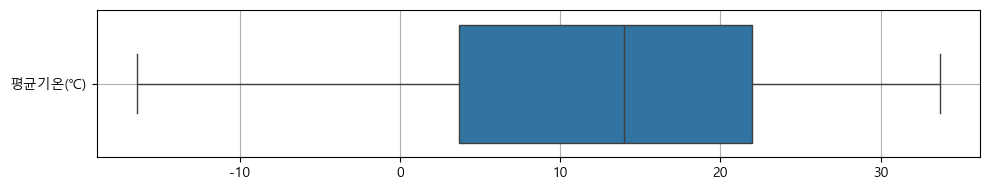

In [5]:
# 데이터 분포 확인
my_boxplot(origin,figsize=(10,2), orient='h')

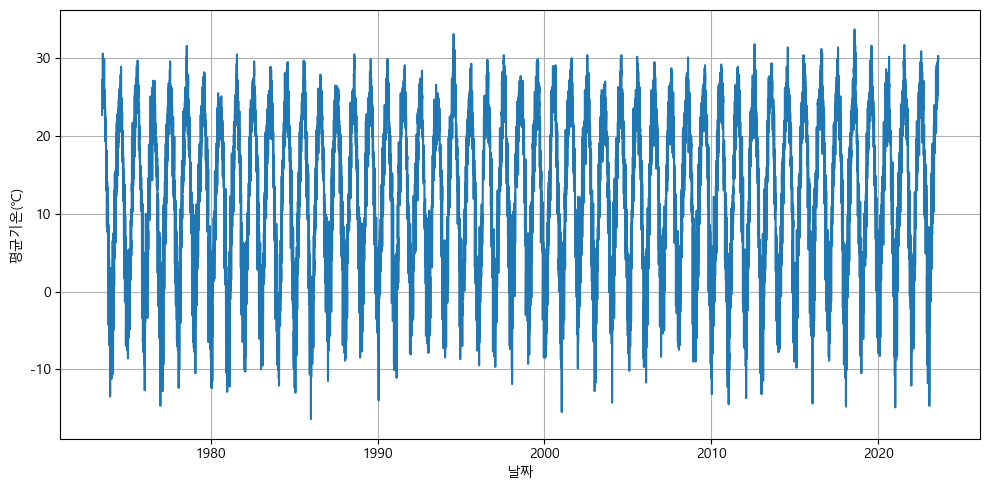

In [6]:
# 기본 형태 
my_lineplot(origin, xname=origin.index, yname='평균기온(℃)')

In [7]:
# ADF test
ar = adfuller(origin['평균기온(℃)'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values): ')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부: ', '정상' if ar[1] <= 0.05 else '비정상')


검정통계량(ADF Statistic): -13.650422
유의수준(p-value): 0.000000
최적차수(num of lags): 45.000000
관측치 개수(num of observations): 18253.000000
기각값(Critical Values): 
	1%: -3.431
	5%: -2.862
	10%: -2.567
데이터 정상성 여부:  정상


In [8]:
# 정상성을 만족하므로 차분하지 않고 이동평균법, 지수평활법 수행
# 이동평균법

df = origin.copy()
df['day90'] = df['평균기온(℃)'].rolling(90).mean()
df['day180'] = df['평균기온(℃)'].rolling(180).mean()
df['day360'] = df['평균기온(℃)'].rolling(360).mean()
df['day540'] = df['평균기온(℃)'].rolling(540).mean()
df['day720'] = df['평균기온(℃)'].rolling(720).mean()
my_pretty_table(df.head(50))

+---------------------+---------------+---------+----------+----------+----------+----------+
| 날짜                |   평균기온(℃) |   day90 |   day180 |   day360 |   day540 |   day720 |
|---------------------+---------------+---------+----------+----------+----------+----------|
| 1973-07-01 00:00:00 |          22.7 |     nan |      nan |      nan |      nan |      nan |
| 1973-07-02 00:00:00 |          23.8 |     nan |      nan |      nan |      nan |      nan |
| 1973-07-03 00:00:00 |          27.2 |     nan |      nan |      nan |      nan |      nan |
| 1973-07-04 00:00:00 |          25.2 |     nan |      nan |      nan |      nan |      nan |
| 1973-07-05 00:00:00 |          26.9 |     nan |      nan |      nan |      nan |      nan |
| 1973-07-06 00:00:00 |          25.6 |     nan |      nan |      nan |      nan |      nan |
| 1973-07-07 00:00:00 |          25.3 |     nan |      nan |      nan |      nan |      nan |
| 1973-07-08 00:00:00 |          26.5 |     nan |      nan |      

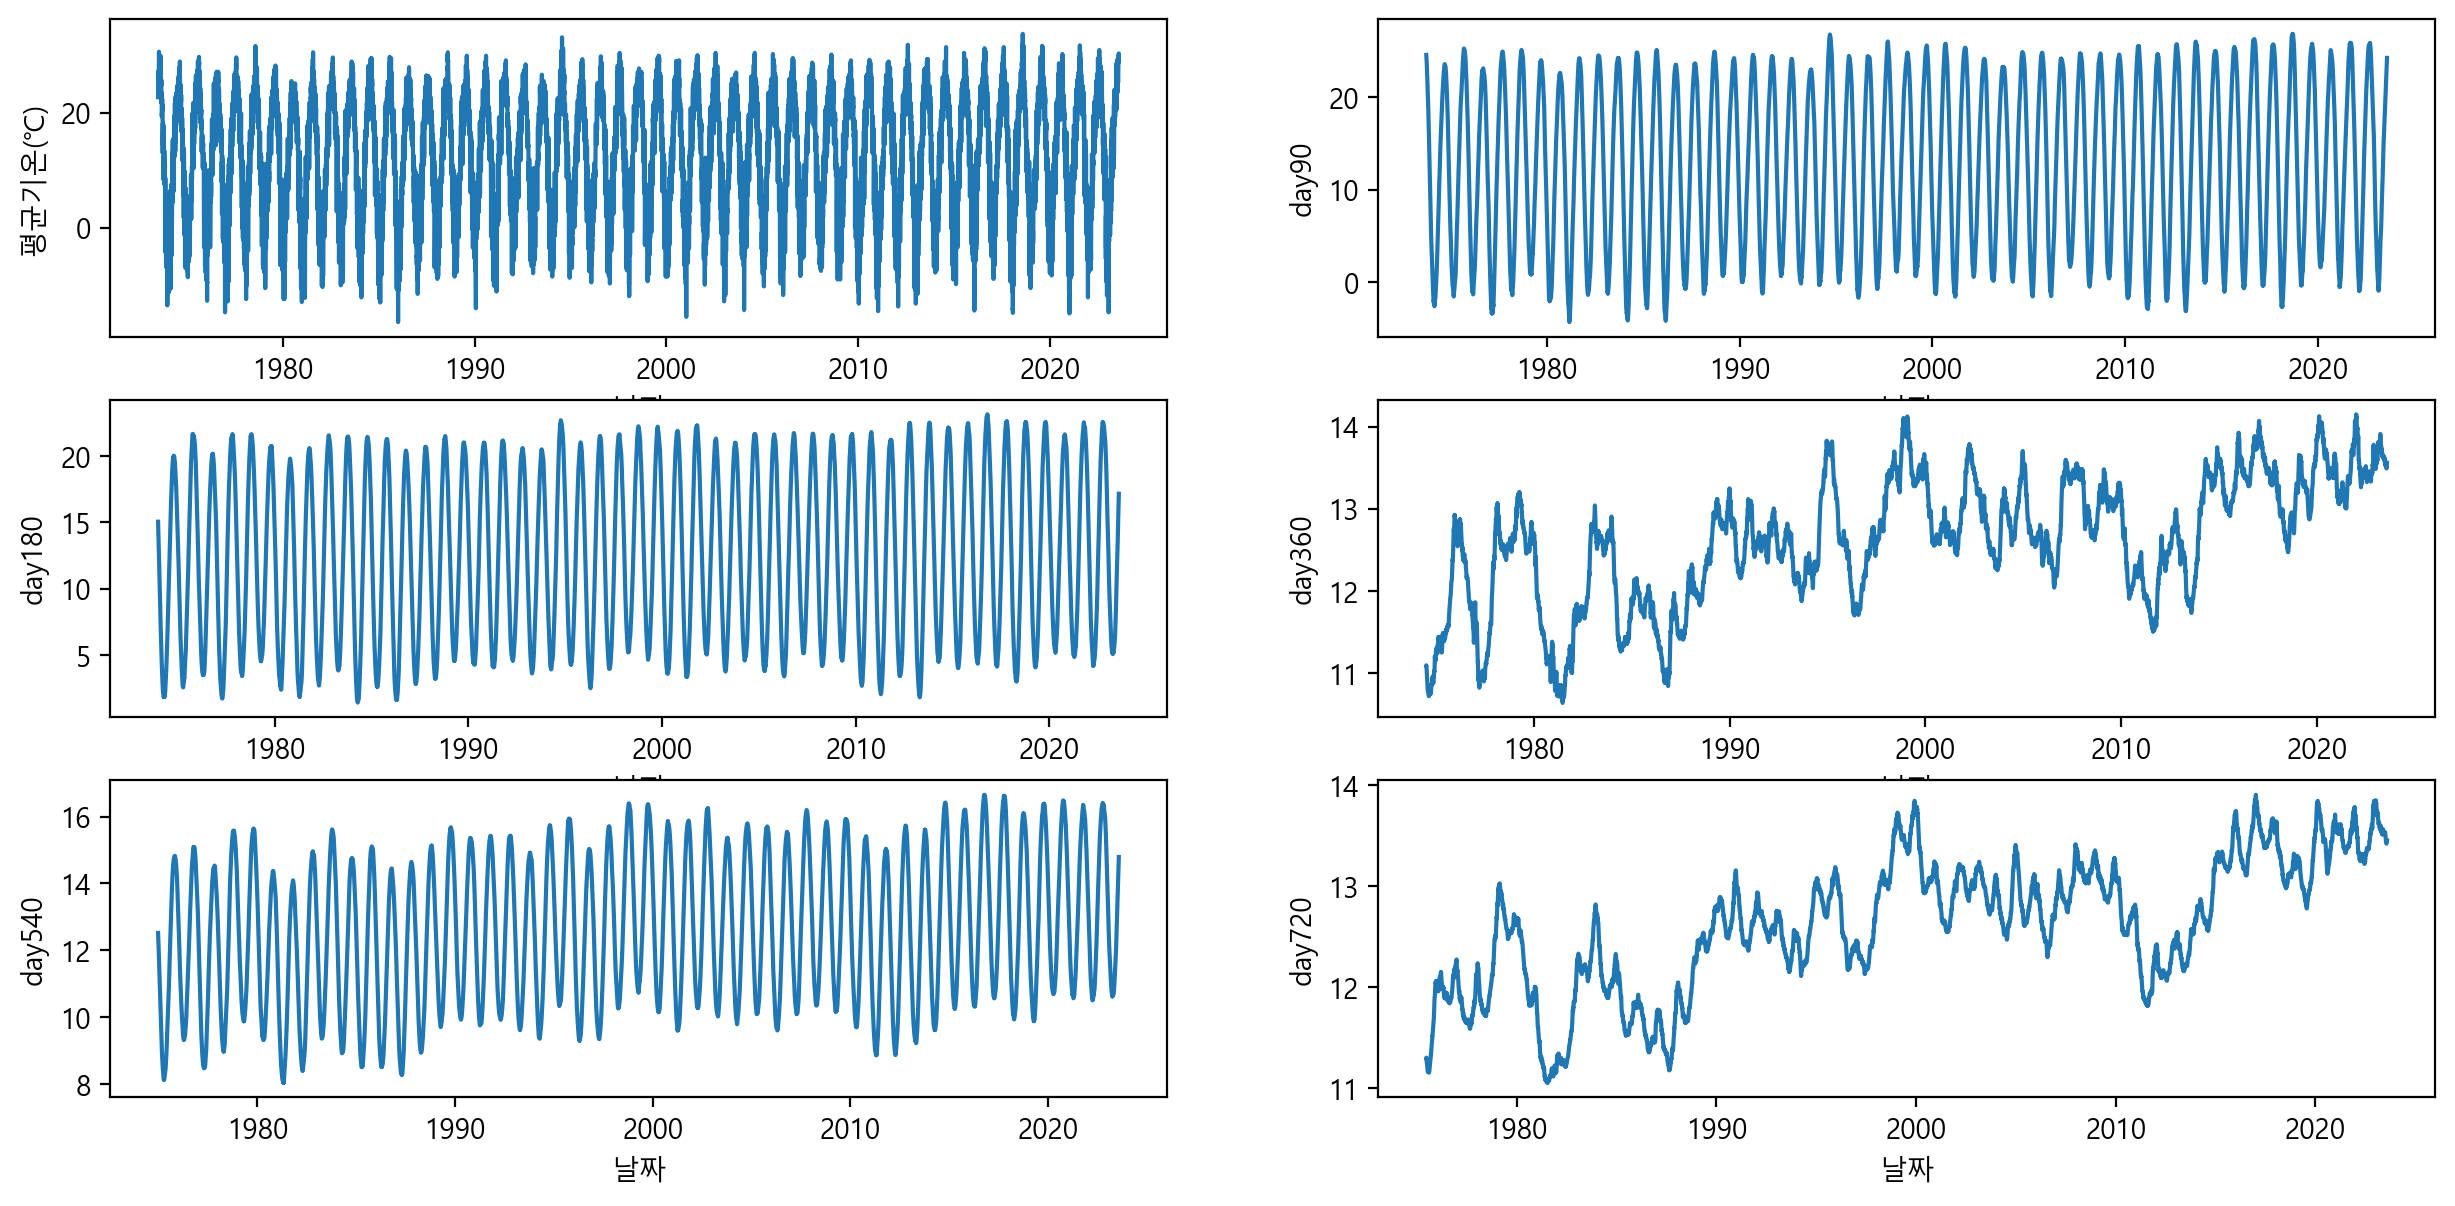

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(15, 7))

sb.lineplot(df, x=df.index, y='평균기온(℃)', ax=ax1)
sb.lineplot(df, x=df.index, y='day90', ax=ax2)
sb.lineplot(df, x=df.index, y='day180', ax=ax3)
sb.lineplot(df, x=df.index, y='day360', ax=ax4)
sb.lineplot(df, x=df.index, y='day540', ax=ax5)
sb.lineplot(df, x=df.index, y='day720', ax=ax6)

plt.show()
plt.close()

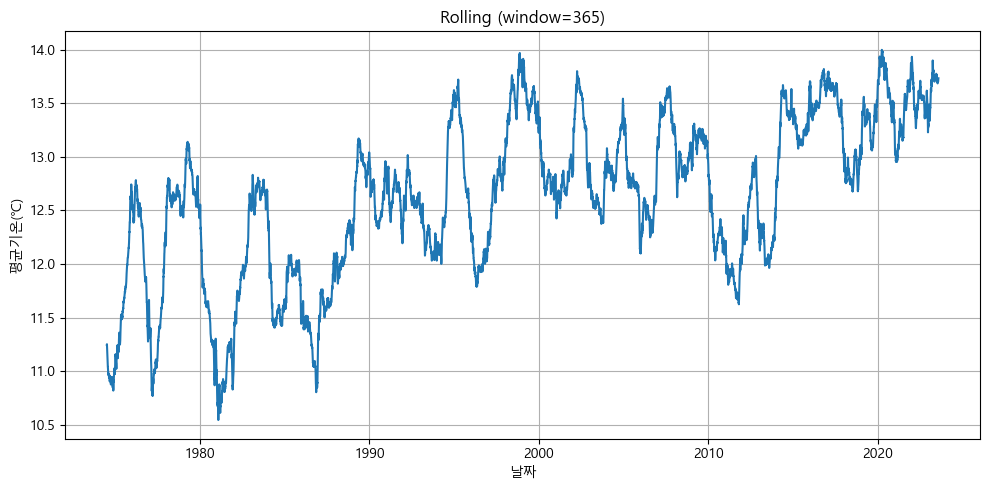

날짜
1973-07-01          NaN
1973-07-02          NaN
1973-07-03          NaN
1973-07-04          NaN
1973-07-05          NaN
                ...    
2023-08-02    13.717534
2023-08-03    13.724110
2023-08-04    13.727123
2023-08-05    13.729589
2023-08-06    13.732603
Name: 평균기온(℃), Length: 18299, dtype: float64

In [10]:
my_rolling(origin['평균기온(℃)'],window=365)

In [11]:
# 지수평활법
df2 = origin.copy()
df2['ewm90'] = df2['평균기온(℃)'].ewm(90).mean()
df2['ewm180'] = df2['평균기온(℃)'].ewm(180).mean()
df2['ewm360'] = df2['평균기온(℃)'].ewm(360).mean()
df2['ewm540'] = df2['평균기온(℃)'].ewm(540).mean()
df2['ewm720'] = df2['평균기온(℃)'].ewm(720).mean()

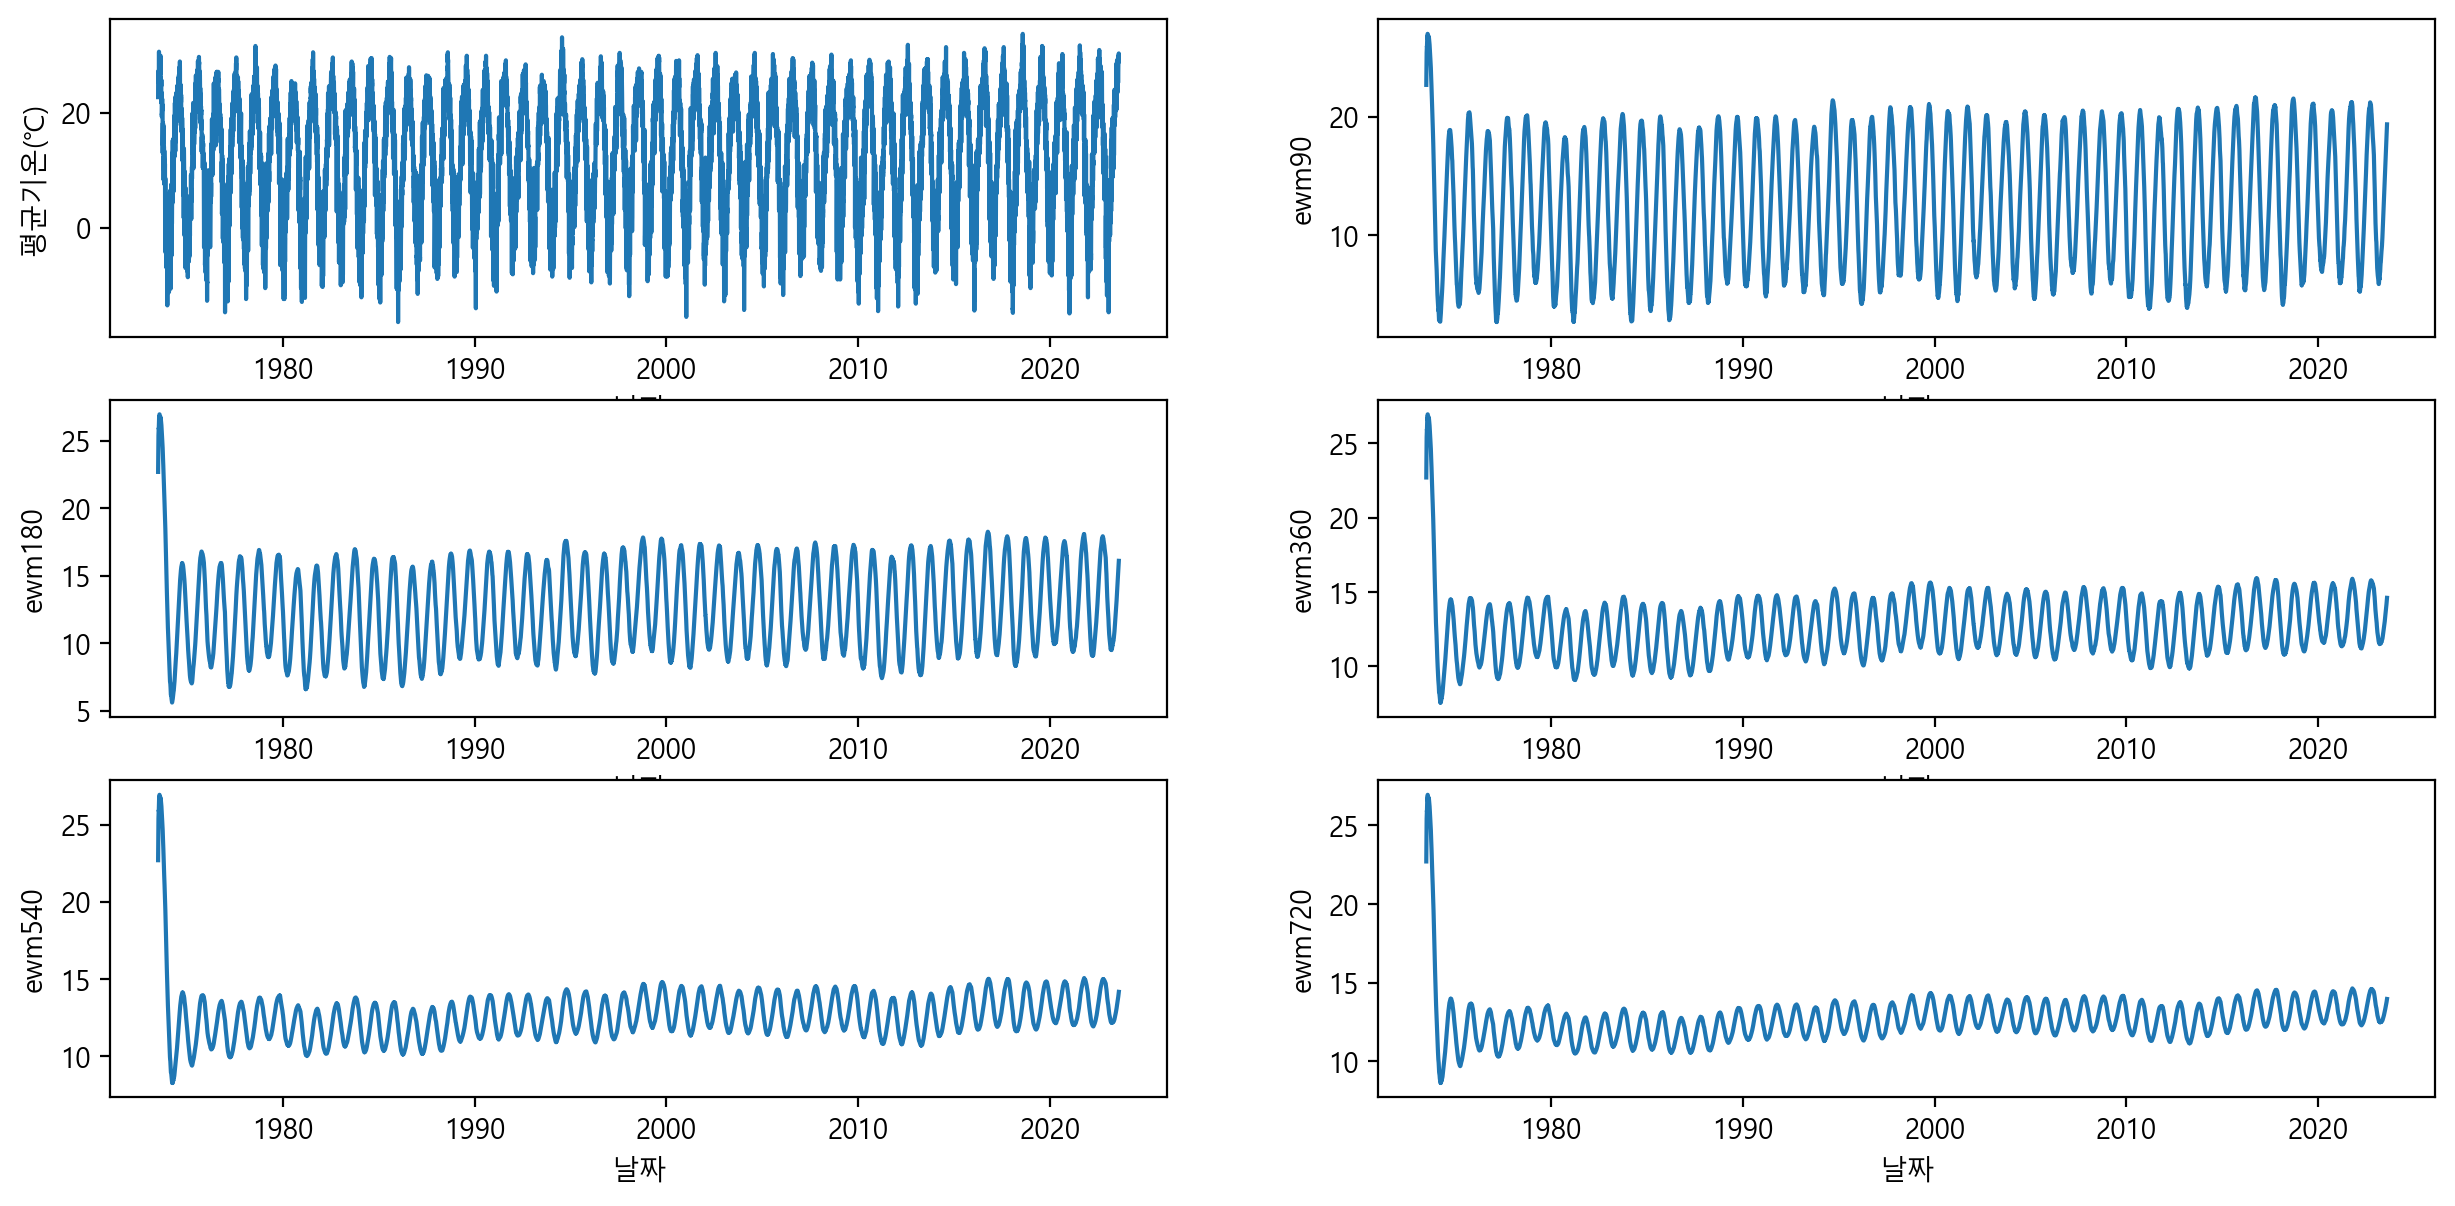

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(15, 7))

sb.lineplot(df2, x=df2.index, y='평균기온(℃)', ax=ax1)
sb.lineplot(df2, x=df2.index, y='ewm90', ax=ax2)
sb.lineplot(df2, x=df2.index, y='ewm180', ax=ax3)
sb.lineplot(df2, x=df2.index, y='ewm360', ax=ax4)
sb.lineplot(df2, x=df2.index, y='ewm540', ax=ax5)
sb.lineplot(df2, x=df2.index, y='ewm720', ax=ax6)

plt.show()
plt.close()

In [13]:
# 분해시계열 (승법모델은 0이 포함되어 있으면 에러가 나므로(0도 존재) 가법 적용)
sd = seasonal_decompose(origin['평균기온(℃)'], model='additive')

sd_df = DataFrame({
    '관측값': sd.observed,
    '트렌드': sd.trend,
    '계절성': sd.seasonal,
    '잔차': sd.resid
}, index= origin.index)

my_pretty_table(sd_df.head(10))

+---------------------+----------+----------+-------------+-----------+
| 날짜                |   관측값 |   트렌드 |      계절성 |      잔차 |
|---------------------+----------+----------+-------------+-----------|
| 1973-07-01 00:00:00 |     22.7 |      nan |  0.00314862 |       nan |
| 1973-07-02 00:00:00 |     23.8 |      nan | -0.00931652 |       nan |
| 1973-07-03 00:00:00 |     27.2 |      nan |   -0.062944 |       nan |
| 1973-07-04 00:00:00 |     25.2 |  25.2429 |  -0.0527275 | 0.0098704 |
| 1973-07-05 00:00:00 |     26.9 |  25.7857 |   0.0155914 |   1.09869 |
| 1973-07-06 00:00:00 |     25.6 |  26.2429 |   0.0328955 | -0.675753 |
| 1973-07-07 00:00:00 |     25.3 |  26.1429 |   0.0733525 |  -0.91621 |
| 1973-07-08 00:00:00 |     26.5 |     26.3 |  0.00314862 |  0.196851 |
| 1973-07-09 00:00:00 |       27 |     26.3 | -0.00931652 |  0.709317 |
| 1973-07-10 00:00:00 |     26.5 |     26.5 |   -0.062944 |  0.062944 |
+---------------------+----------+----------+-------------+-----------+


In [14]:
origin[origin['평균기온(℃)'] == 0]

,평균기온(℃)
날짜,
1973-11-25,0.0
1975-01-25,0.0
1975-03-01,0.0
1979-03-02,0.0
1979-11-12,0.0
1980-01-09,0.0
1982-12-27,0.0
1983-02-15,0.0
1987-02-20,0.0


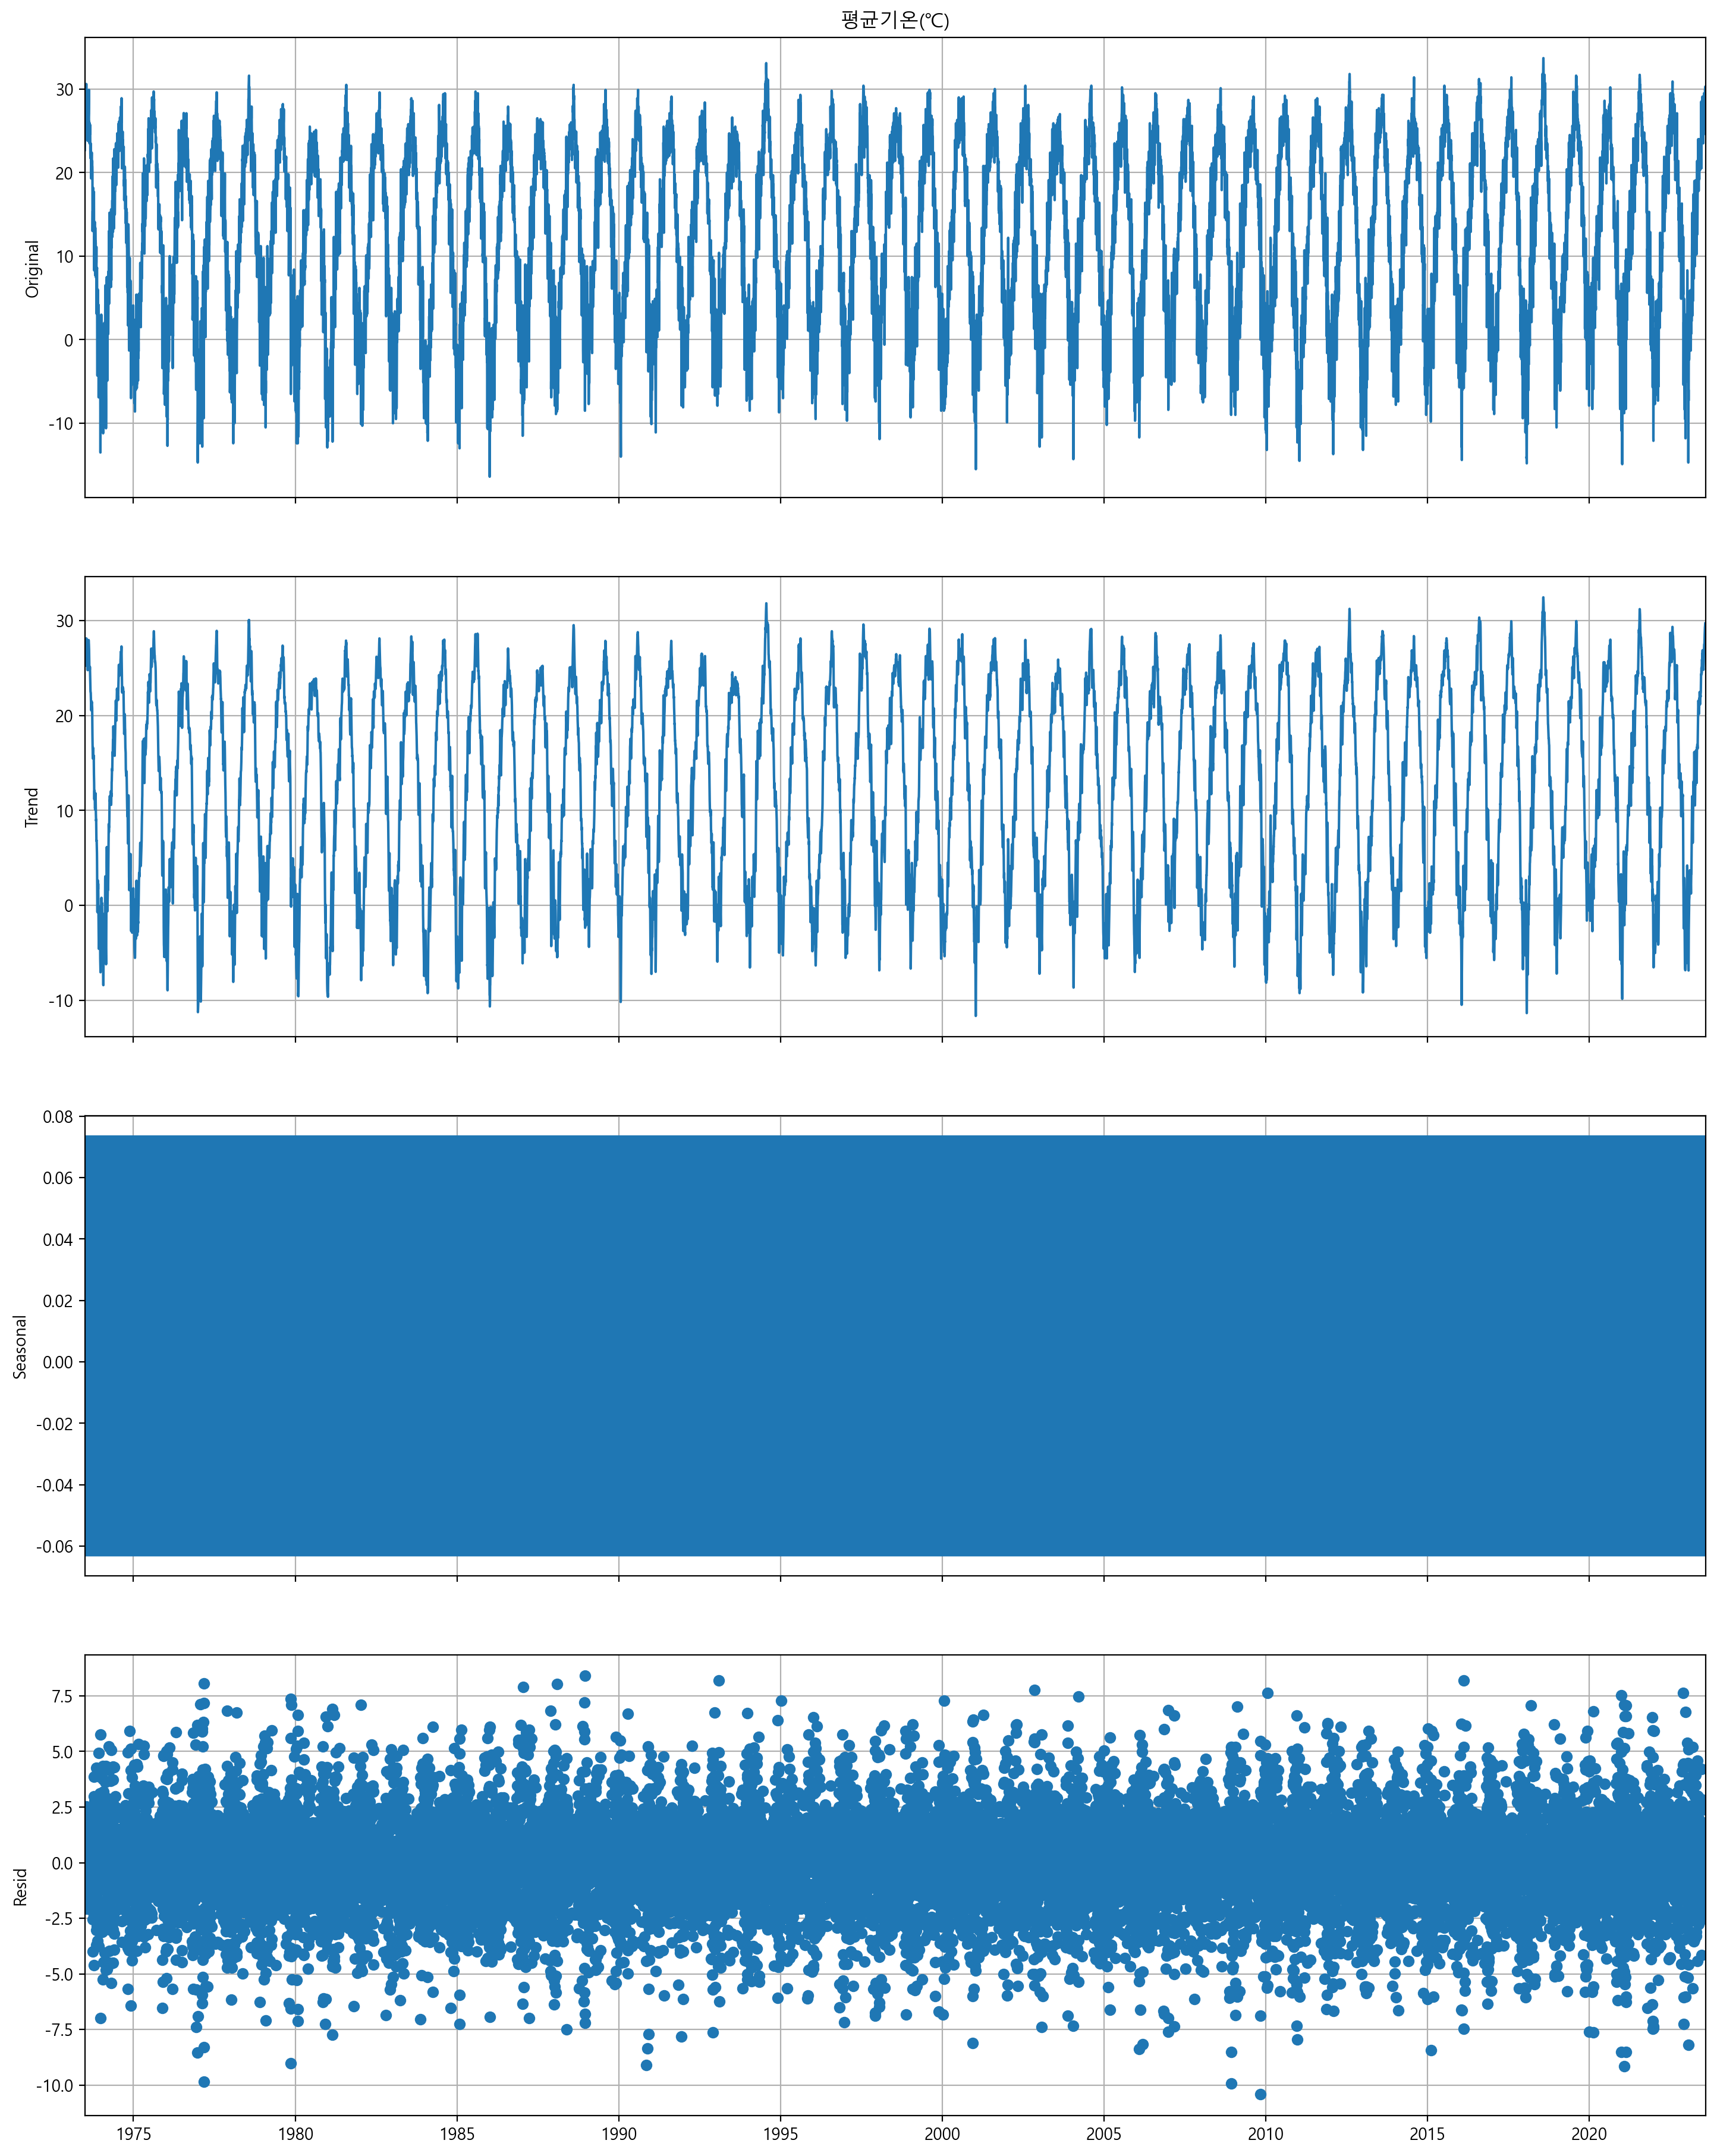

In [15]:
# 분해시계열 시각화
figure = sd.plot()
figure.set_size_inches((15, 20))

fig, ax1, ax2, ax3, ax4 = figure.get_children()

ax1.set_ylabel('Original')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()
plt.close()

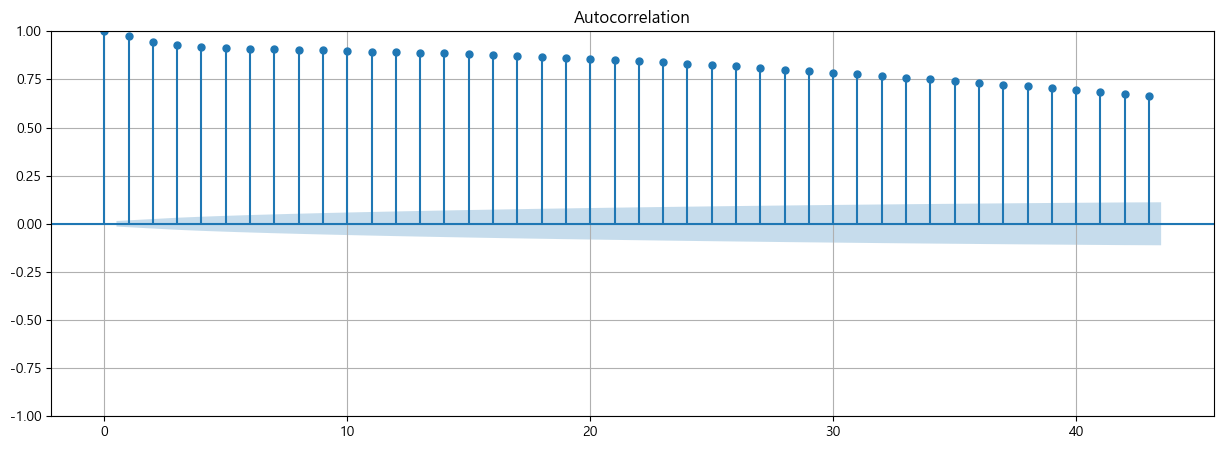

In [16]:
# ACF 플롯
fig = plt.figure(figsize=(15, 5), dpi=100)
ax = fig.gca()

plot_acf(origin['평균기온(℃)'],ax=ax)

ax.grid()
plt.show()
plt.close()

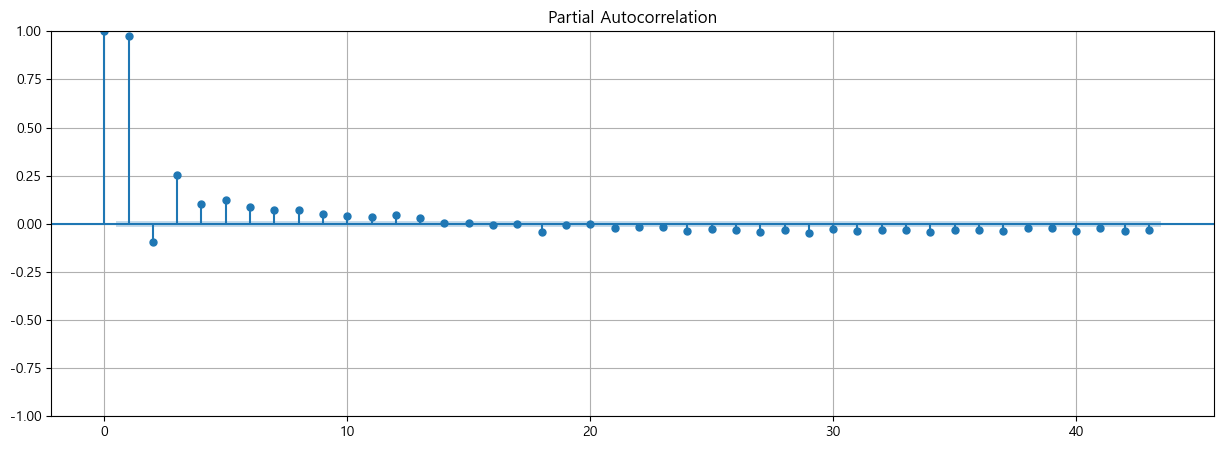

In [17]:
# PACF 플롯
fig = plt.figure(figsize=(15, 5), dpi=100)
ax = fig.gca()

plot_pacf(origin['평균기온(℃)'],ax=ax)

ax.grid()
plt.show()
plt.close()

> ACF plot 은 완만, PACF플롯은 급격 -> AR(1) 모델로 결정, 차분은 0

In [18]:
# ARIMA 수행 
# model = ARIMA(origin['평균기온(℃)'], seasonal_order=(1,0,0,365))
# fit = model.fit()
# print(fit.summary())

In [19]:
#-------------------------------------------------
# 일단위로 하면 너무 데이터가 많아 월 단위로 묶음
#-------------------------------------------------

In [21]:
df = origin['날짜'].dt.month
df

KeyError: '날짜'